In [3]:
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image as pil_image

# Determine the size of each image
from os.path import isfile

%matplotlib inline

# BackGround

After centuries of intense whaling, recovering whale populations still have a hard time adapting to warming oceans and struggle to compete every day with the industrial fishing industry for food.

To aid whale conservation efforts, scientists use photo surveillance systems to monitor ocean activity. They use the shape of whales’ tails and unique markings found in footage to identify what species of whale they’re analyzing and meticulously log whale pod dynamics and movements. For the past 40 years, most of this work has been done manually by individual scientists, leaving a huge trove of data untapped and underutilized.

In this competition, you’re challenged to build an algorithm to identify individual whales in images. You’ll analyze Happywhale’s database of over 25,000 images, gathered from research institutions and public contributors. By contributing, you’ll help to open rich fields of understanding for marine mammal population dynamics around the globe.

Note, this competition is similar in nature to this competition with an expanded and updated dataset.

We'd like to thank Happywhale for providing this data and problem. Happywhale is a platform that uses image process algorithms to let anyone to submit their whale photo and have it automatically identified. 

# Goal
*Identify a Whale by its tail.* 

# Dataset Description

This training data contains thousands of images of humpback whale flukes. Individual whales have been identified by researchers and given an Id. The challenge is to predict the whale Id of images in the test set. What makes this such a challenge is that there are only a few examples for each of 3,000+ whale Ids.

# File descriptions

* train.zip - a folder containing the training images
* train.csv - maps the training Image to the appropriate whale Id. Whales that are not predicted to have a label identified * in the training data should be labeled as new_whale.
* test.zip - a folder containing the test images to predict the whale Id
* sample_submission.csv - a sample submission file in the correct format


## Showing some images

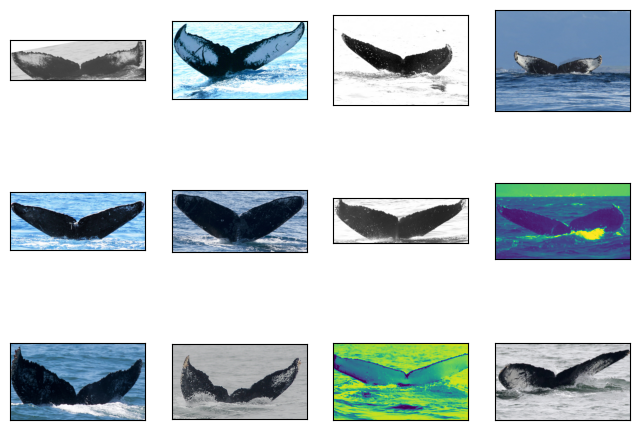

In [4]:
import os
fig = plt.figure(figsize=(8, 8 ), dpi=100,facecolor='w', edgecolor='k')
train_imgs = os.listdir("./train/")
for idx, img in enumerate(np.random.choice(train_imgs, 12)):
    ax = fig.add_subplot(4, 20//5, idx+1, xticks=[], yticks=[])
    im = pil_image.open("./train/" + img)
    plt.imshow(im)

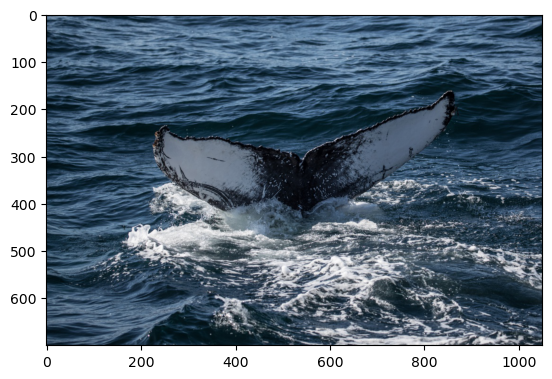

In [5]:
import cv2
# If you need to install CV: https://stackoverflow.com/questions/19876079/cannot-find-module-cv2-when-using-opencv
# helpful: https://stackoverflow.com/questions/54959387/rgb-image-display-in-matplotlib-plt-imshow-returns-a-blue-image
im = cv2.imread("./train/"+train_imgs[0] , 1)

image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

pixels = np.array(image)

plt.imshow(pixels)
plt.show()

## Importing Dataset

In [6]:
# load image data
#image name
train_df = pd.read_csv('./train.csv')
train_df.head(10)

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale
5,0006e997e.jpg,new_whale
6,000a6daec.jpg,w_dd88965
7,000f0f2bf.jpg,new_whale
8,0016b897a.jpg,w_64404ac
9,001c1ac5f.jpg,w_a6f9d33


In [7]:
train_df.tail(10)

,Image,Id
25351,ffd61cded.jpg,new_whale
25352,ffd7a6f5a.jpg,w_84c23bb
25353,ffdddcc0f.jpg,new_whale
25354,ffe52d320.jpg,w_bc285a6
25355,ffe7560cd.jpg,w_6d8b67b
25356,ffef89eed.jpg,w_9c506f6
25357,fff7faf61.jpg,w_9cf0388
25358,fff9002e0.jpg,w_bd1c3d5
25359,fffcde6fe.jpg,w_9f30885
25360,fffde072b.jpg,new_whale


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25361 entries, 0 to 25360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   25361 non-null  object
 1   Id      25361 non-null  object
dtypes: object(2)
memory usage: 396.4+ KB


In [9]:
# rows and columns
train_df.shape

(25361, 2)

In [10]:
train_df.shape[0]

25361

In [11]:
train_df.describe()

,Image,Id
count,25361,25361
unique,25361,5005
top,0000e88ab.jpg,new_whale
freq,1,9664


### Creating x_train and y_train

In [12]:
y_train = train_df["Id"]

# drop the id column
X_train = train_df.drop(['Id'], axis=1)
print(y_train[0])
y_train.head()

w_f48451c


0    w_f48451c
1    w_c3d896a
2    w_20df2c5
3    new_whale
4    new_whale
Name: Id, dtype: object

In [13]:
X_train.head()

,Image
0,0000e88ab.jpg
1,0001f9222.jpg
2,00029d126.jpg
3,00050a15a.jpg
4,0005c1ef8.jpg


## Prepareing images
Prepocess



In [14]:
# from keras.preprocessing import image
import keras.utils as image
from keras.applications.imagenet_utils import preprocess_input

In [15]:
# # list that holds elemnts given that are list of 100 of list of 100 with 3 elements
# x_train = np.zeros((2, 4,3,5))

# print(x_train)

In [16]:
def prepareImages(train, shape, path):
    # list that holds elemnts given that are list of 100 of list of 100 with 3 elements
    # i.e.   num of images of size 100x100x3 
    X_train = np.zeros((shape, 100, 100, 3))
    count = 0
    
    # helpful link: https://www.tensorflow.org/api_docs/python/tf/keras/utils/img_to_array
    for fig in train['Image']:
        
        #load images into images of size 100x100x3
        # helpful link: https://www.tensorflow.org/api_docs/python/tf/keras/utils/load_img
        img = image.load_img("./"+path+"/"+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)
        # print(x)

        X_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    return X_train

In [17]:
X_train = prepareImages(train_df, train_df.shape[0], "train")

Processing image:  1 ,  0000e88ab.jpg
Processing image:  501 ,  04c72257b.jpg
Processing image:  1001 ,  09cacb84d.jpg
Processing image:  1501 ,  0ef961892.jpg
Processing image:  2001 ,  141b56a1a.jpg
Processing image:  2501 ,  199a417aa.jpg
Processing image:  3001 ,  1ec170983.jpg
Processing image:  3501 ,  23f084b93.jpg
Processing image:  4001 ,  29163ad0b.jpg
Processing image:  4501 ,  2e0fab120.jpg
Processing image:  5001 ,  3347515d9.jpg
Processing image:  5501 ,  3842d71dc.jpg
Processing image:  6001 ,  3d7f4c7d5.jpg
Processing image:  6501 ,  425f763ca.jpg
Processing image:  7001 ,  4714400cd.jpg
Processing image:  7501 ,  4c082fbdf.jpg
Processing image:  8001 ,  50c683e23.jpg
Processing image:  8501 ,  560d986ad.jpg
Processing image:  9001 ,  5b68c83ed.jpg
Processing image:  9501 ,  60410f111.jpg
Processing image:  10001 ,  654951f81.jpg
Processing image:  10501 ,  6a572256c.jpg
Processing image:  11001 ,  6f96f55b6.jpg
Processing image:  11501 ,  74da2b511.jpg
Processing image

## Normalize the data

In [18]:
# simply normalize the features to the range of [0,1]:

X_train = X_train.astype('float32')
X_train /= 255.0

In [19]:
print(X_train.shape)

(25361, 100, 100, 3)


In [20]:
print(X_train)

[[[[-5.85843250e-02 -1.95211768e-01 -3.20313722e-01]
   [-2.72117760e-02 -1.71682343e-01 -2.92862743e-01]
   [ 4.72980291e-02 -1.08937249e-01 -2.18352944e-01]
   ...
   [ 1.20039098e-02 -1.59917638e-01 -2.77176470e-01]
   [-1.87996089e-01 -3.08937252e-01 -4.26196069e-01]
   [ 3.94548886e-02 -1.08937249e-01 -2.37960786e-01]]

  [[ 1.33572534e-01 -1.08980369e-02 -1.47764713e-01]
   [ 2.00239211e-01  6.36117682e-02 -6.14901967e-02]
   [-7.60393310e-03 -1.63839206e-01 -2.96784312e-01]
   ...
   [ 8.08234140e-03 -1.63839206e-01 -2.81098038e-01]
   [ 9.04352814e-02 -8.93294066e-02 -2.18352944e-01]
   [ 5.12195975e-02 -1.20701961e-01 -2.45803922e-01]]

  [[-2.32902076e-02 -1.67760774e-01 -2.88941175e-01]
   [ 7.86705762e-02 -7.36431330e-02 -1.94823533e-01]
   [-3.68236471e-03 -1.52074501e-01 -2.81098038e-01]
   ...
   [ 8.65137130e-02 -8.14862698e-02 -2.14431375e-01]
   [ 1.25729397e-01 -5.40352911e-02 -1.83058828e-01]
   [ 2.23768622e-01  5.57686314e-02 -7.71764740e-02]]

  ...

  [[-3.50549

In [21]:
print(X_train.shape)

(25361, 100, 100, 3)


### Display some images

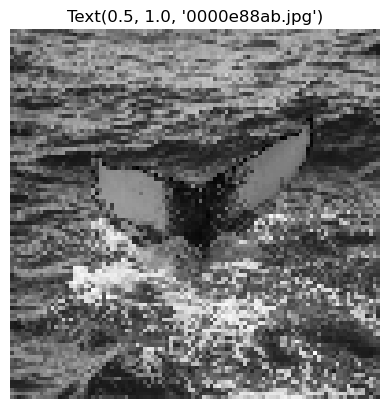

In [22]:

# https://stackoverflow.com/questions/40557910/plt-plot-meaning-of-0-and-1
# print(X_train[2][:,:])
plt.imshow(X_train[0][:,:,0], cmap="gray")
plt.title(plt.title(train_df.iloc[0,0]))
plt.axis("off")
plt.show()



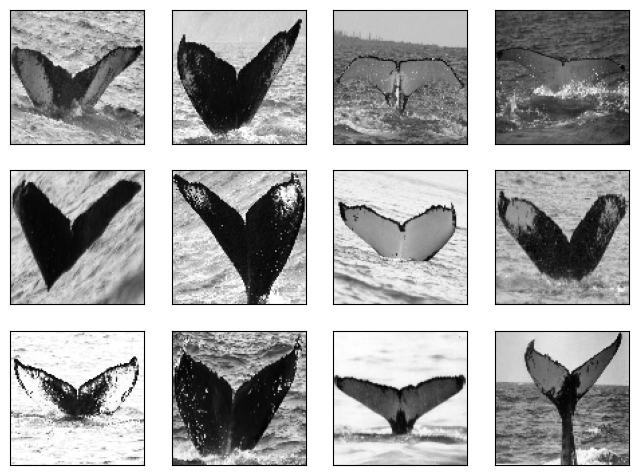

In [23]:
fig = plt.figure(figsize=(8, 8 ), dpi=100,facecolor='w', edgecolor='k')
train_imgs = os.listdir("./train/")
# show the first 12 images
for idx, img in enumerate(np.random.choice(train_imgs, 12)):
    ax = fig.add_subplot(4, 20//5, idx+1, xticks=[], yticks=[])
    plt.imshow(X_train[idx+1][:,:,0], "gray")
    

### Encoding Label

The labels are IDs such as "w_f48451c" so we need to encode them.

In [24]:
print(y_train.shape)

(25361,)


In [25]:
print(y_train[0])

w_f48451c


In [26]:
train_df.Id.describe()

count         25361
unique         5005
top       new_whale
freq           9664
Name: Id, dtype: object

In [27]:
from keras.utils import np_utils 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [28]:
y_train = label_encoder.fit_transform(y_train)
# THe zeros indicate new whales
y_train[0:10]  

array([4786, 3808,  662,    0,    0,    0, 4315,    0, 1929, 3237])

In [29]:
y_train = np_utils.to_categorical(y_train, 5005)

In [30]:
# (rows, cols)
print(y_train.shape)

(25361, 5005)


In [31]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [32]:
np.random.seed(0)

## Defining the Network Archetecture (model)

In [37]:


# THis model is so we can stack neural net3orks
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization


In [38]:

# The Sequential model for the network
model = Sequential()

In [39]:
# CNN first layer with 16 output filters with 5x5 convoltion ( kernal_size) 
model.add(Convolution2D(filters = 16, kernel_size = (5,5), activation = 'relu', input_shape = (100,100,3)))
model.add(BatchNormalization())
print(model.output_shape)

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
print(model.output_shape)

# Dropout layer to avoid overfitting
model.add(Dropout(0.25)) 


(None, 96, 96, 16)
(None, 48, 48, 16)


In [40]:


# adding hidden layers
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
print(model.output_shape)

# Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
print(model.output_shape)

# Dropout layer to avoid overfitting
model.add(Dropout(0.25)) 



(None, 46, 46, 32)
(None, 23, 23, 32)


In [41]:
# gonna do the same as last layer
model.add(Convolution2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(BatchNormalization())
print(model.output_shape)

model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(BatchNormalization())
print(model.output_shape)

model.add(Dropout(0.25))

(None, 23, 23, 64)
(None, 11, 11, 64)


In [42]:


# output Fully connected Dense layers:
model.add(Flatten())
print(model.output_shape)

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

print(model.output_shape)

model.add(Dropout(0.5))
# output layer that will categorize the images  usubng the amount of unique nodes
model.add(Dense(y_train.shape[1], activation='softmax'))
print(model.output_shape)



(None, 7744)
(None, 128)
(None, 5005)


In [43]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 16)        1216      
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 16)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 16)       64        
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 48, 48, 16)        0         
                                                        

## Compile Model

In [44]:
# Adam will change the learning rate during training
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [45]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 16)        1216      
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 16)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 16)       64        
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 48, 48, 16)        0         
                                                        

# Training

In [46]:
epochs = 50  
batch_size = 1000

In [47]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/50
16/26 [=================>............] - ETA: 30s - loss: 8.2761 - accuracy: 0.1426

### Model evaluation/Visualization

## Testing

In [ ]:
test = os.listdir("./test/")
print(len(test))

7960


In [ ]:
col = ['Image']
test_data = pd.DataFrame(test, columns=col)
test_data['Id'] = ''

In [ ]:
x_test = prepareImages(test_data, test_data.shape[0], "test")
x_test /= 255

Processing image:  1 ,  00028a005.jpg
Processing image:  501 ,  0f9219c40.jpg
Processing image:  1001 ,  1ea95c247.jpg
Processing image:  1501 ,  2fe4ec2d5.jpg
Processing image:  2001 ,  404206f77.jpg
Processing image:  2501 ,  4fc69fd82.jpg
Processing image:  3001 ,  5ffc2d300.jpg
Processing image:  3501 ,  7042be267.jpg
Processing image:  4001 ,  801c6a722.jpg
Processing image:  4501 ,  906aa36c8.jpg
Processing image:  5001 ,  a0d337cdc.jpg
Processing image:  5501 ,  b1a4e4c18.jpg
Processing image:  6001 ,  c0b378682.jpg
Processing image:  6501 ,  cfe9d9d04.jpg
Processing image:  7001 ,  e00620fc3.jpg
Processing image:  7501 ,  f1b504951.jpg


In [ ]:
predictions = model.predict(np.array(x_test), verbose=1)

249/249 [==============================] - 10s 38ms/step


In [ ]:
for i, pred in enumerate(predictions):
    test_data.loc[i, 'Id'] = ' '.join(label_encoder.inverse_transform(pred.argsort()[-5:][::-1]))

In [ ]:
test_data.head(10)
test_data.to_csv('submission_3.csv', index=False)